In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [4]:
df = pd.read_csv('../../Data/daily_usr_cnt_with_holiday_tot_clean.csv')

In [3]:
df.head()

,date,cnt_station,cnt_bike,is_rain,is_holiday,year,month,day,weekday,weeknum,cnt
0,2017-06-21,743,9855,0,0,2017,6,21,2,25,13.0
1,2017-06-22,743,9855,0,0,2017,6,22,3,25,40.0
2,2017-06-23,790,10415,0,0,2017,6,23,4,25,39.0
3,2017-06-24,790,10415,1,0,2017,6,24,5,25,28.0
4,2017-06-25,792,10455,0,0,2017,6,25,6,25,28.0


In [75]:
def get_boxplot_of_categories(data_frame, categorical_column, numerical_column):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from collections import Counter    
    keys = []
    for i in dict(Counter(df[categorical_column].values)):
        keys.append(i)
    print(keys)
    
    df_new = df[df[categorical_column].isin(keys)]
    
    ax = plt.subplots(figsize=(10, 7))
    ax = sns.boxplot(x = df_new[categorical_column], y = df_new[numerical_column])
    
    ax.set_title(categorical_column) 
    ax.set_xlabel(categorical_column) 
    ax.set_ylabel(numerical_column)

In [76]:
def plotly_boxplot(df , numeric_types , color  , row = None) :
    import plotly.express as px
    import pandas as pd
    def gather( df, key, value, cols ):
        id_vars = [ col for col in df.columns if col not in cols ]
        id_values = cols
        var_name = key
        value_name = value
        return pd.melt( df, id_vars, id_values, var_name, value_name )
    numeric_gather = gather( df , 'key', 'value', numeric_types )
    fig = px.box(numeric_gather, x="key", y="value",
                 facet_col="key" ,color = color , 
                 facet_row=row )
    fig.update_yaxes(showticklabels=True , matches=None)
    fig.update_xaxes(showticklabels=True , matches=None)
    fig.show()

[0, 1]


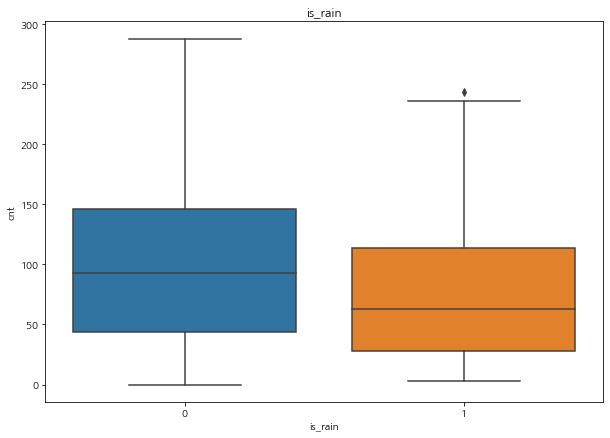

In [77]:
get_boxplot_of_categories(df, 'is_rain', 'cnt')

[0, 1]


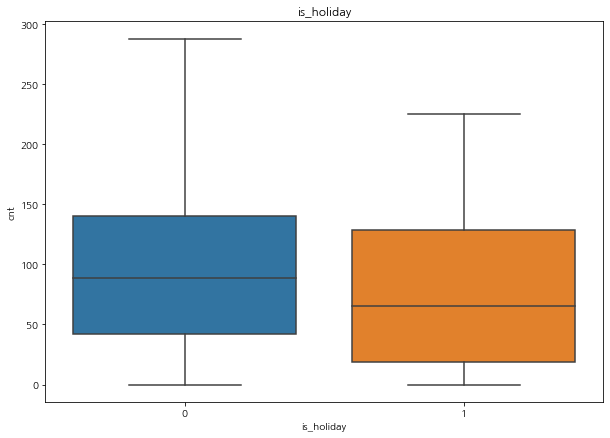

In [78]:
get_boxplot_of_categories(df, 'is_holiday', 'cnt')

[2017, 2018, 2019]


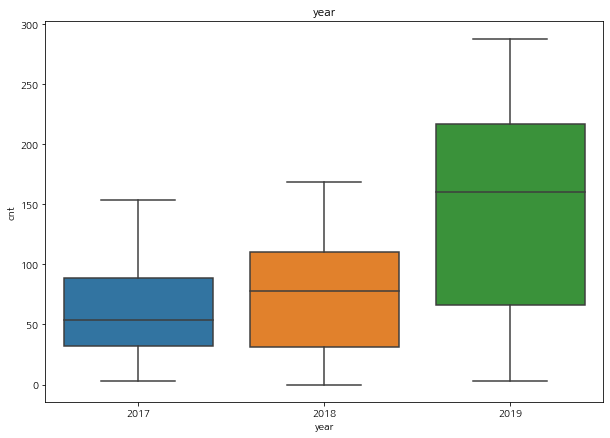

In [79]:
get_boxplot_of_categories(df, 'year', 'cnt')

[2, 3, 4, 5, 6, 0, 1]


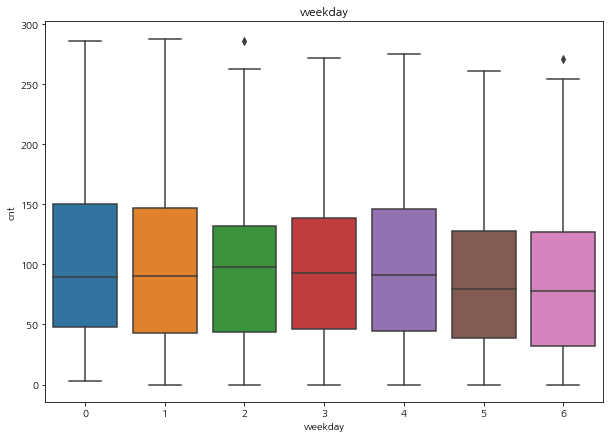

In [80]:
get_boxplot_of_categories(df, 'weekday', 'cnt')

[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


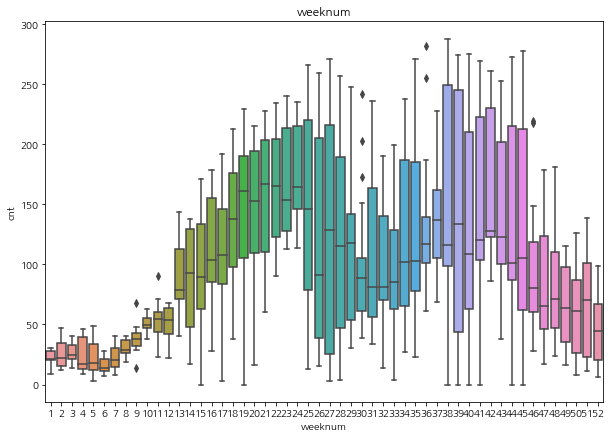

In [81]:
get_boxplot_of_categories(df, 'weeknum', 'cnt')

## Correlation

In [85]:
# get pairplot
# subset
subset = df[['cnt_station','cnt_bike','is_rain','is_holiday','weekday','weeknum','cnt']]
subset.head()

,cnt_station,cnt_bike,is_rain,is_holiday,weekday,weeknum,cnt
0,743,9855,0,0,2,25,13.0
1,743,9855,0,0,3,25,40.0
2,790,10415,0,0,4,25,39.0
3,790,10415,1,0,5,25,28.0
4,792,10455,0,0,6,25,28.0


In [86]:
subset_corr = subset.corr()
subset_corr

,cnt_station,cnt_bike,is_rain,is_holiday,weekday,weeknum,cnt
cnt_station,1.000000,0.999964,-0.074232,0.013700,0.000681,-0.057966,0.431668
cnt_bike,0.999964,1.000000,-0.074130,0.013873,0.000713,-0.059547,0.431977
is_rain,-0.074232,-0.074130,1.000000,-0.007511,-0.030829,0.013808,-0.131848
is_holiday,0.013700,0.013873,-0.007511,1.000000,-0.078708,-0.034502,-0.044334
weekday,0.000681,0.000713,-0.030829,-0.078708,1.000000,-0.010518,-0.066431
weeknum,-0.057966,-0.059547,0.013808,-0.034502,-0.010518,1.000000,0.231716
cnt,0.431668,0.431977,-0.131848,-0.044334,-0.066431,0.231716,1.000000


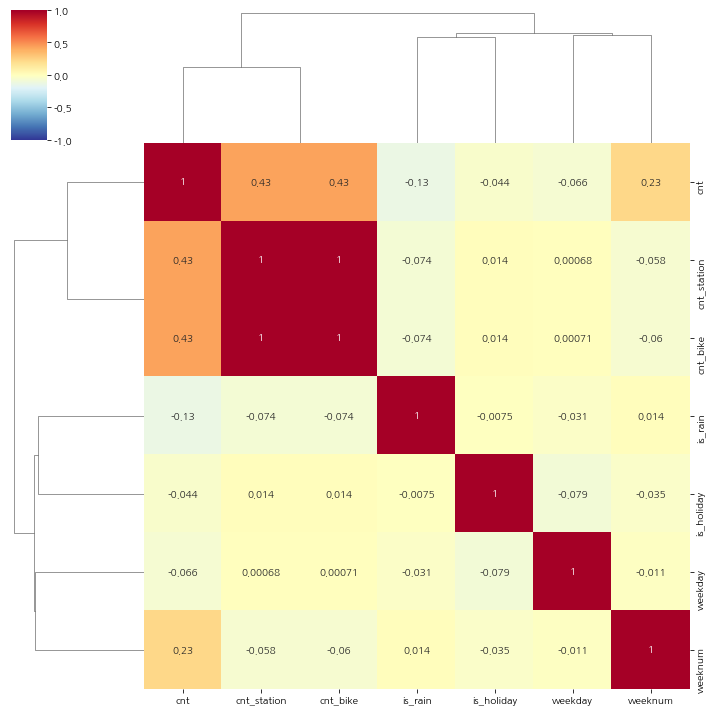

In [87]:
sns.clustermap(subset_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

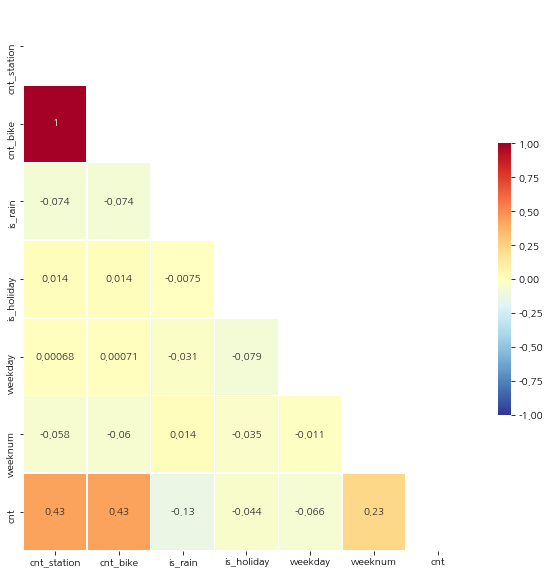

In [89]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(subset_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(subset_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## Time-series

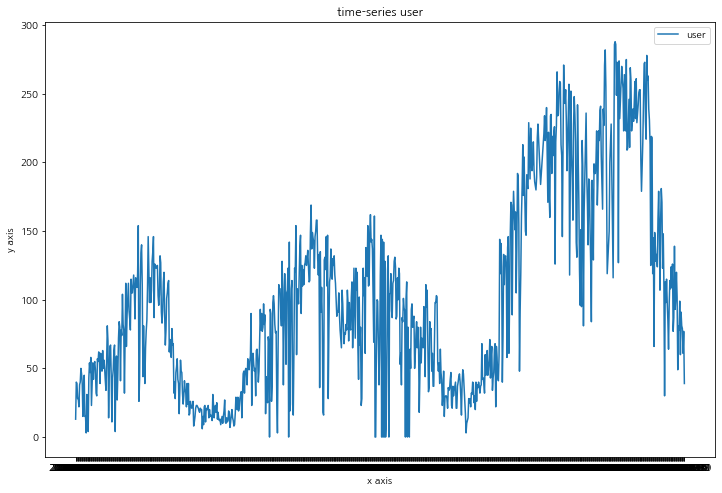

In [91]:
# user count
fig, ax = plt.subplots(figsize=(12,8)) 

# Creating some  dummy data
ax.plot(df['date'], df['cnt'], label = 'user')
ax.set_xlabel('x axis') 
ax.set_ylabel('y axis')
ax.set_title("time-series user")
ax.legend()

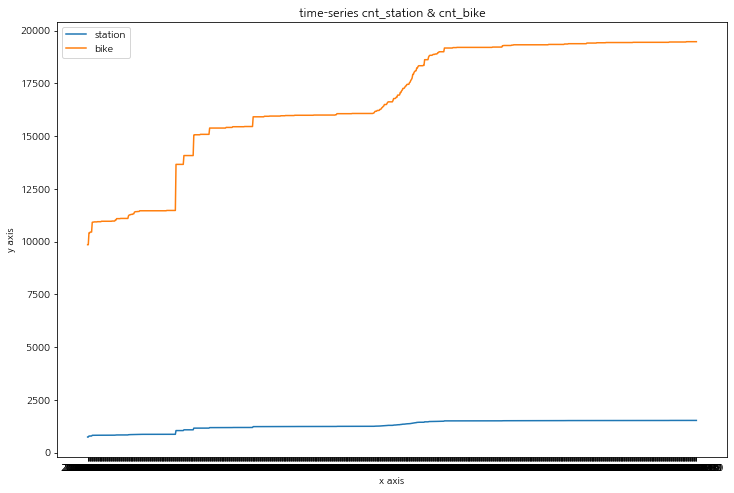

In [92]:
# cnt_station & cnt_bike
# Declare a chart with one Axis
fig, ax = plt.subplots(figsize=(12,8)) 

# Creating some  dummy data
ax.plot(df['date'], df['cnt_station'], label = 'station')
ax.plot(df['date'], df['cnt_bike'], label = 'bike') 
ax.set_xlabel('x axis') 
ax.set_ylabel('y axis')
ax.set_title("time-series cnt_station & cnt_bike")
ax.legend()

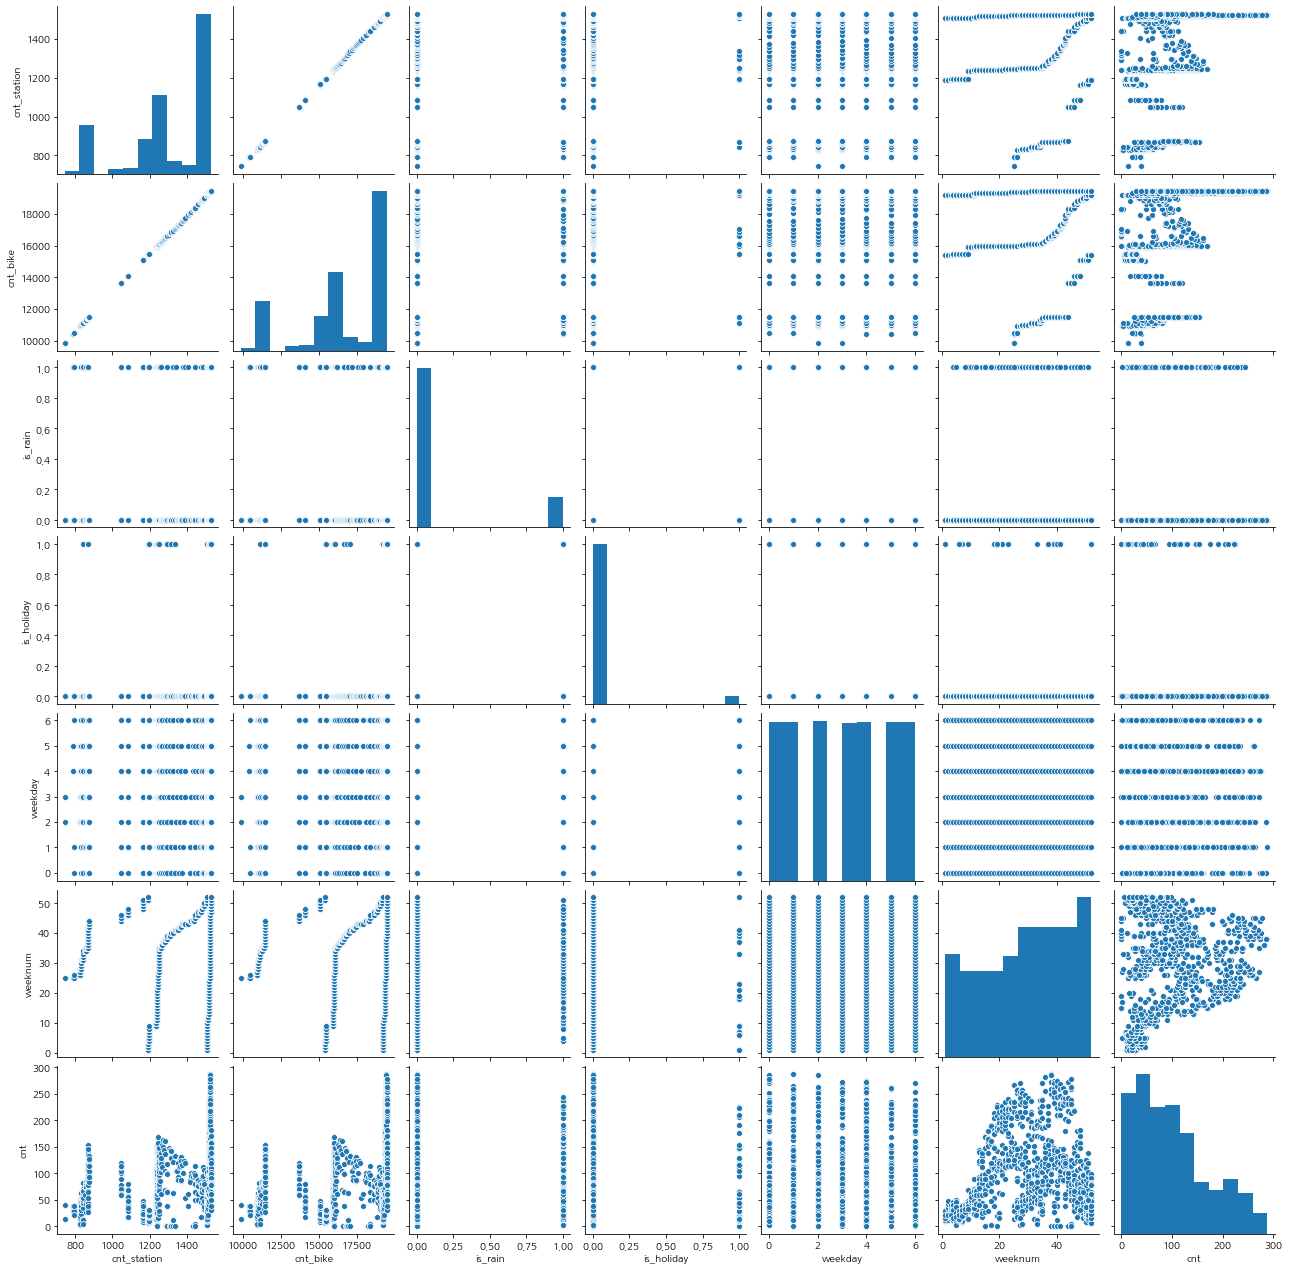

In [15]:
sns.pairplot(subset)